# Sentiment Analysis 

Sentiment analysis is the process of understanding the opinion of an author about a subject.

Three typical elements of a sentiment analysis system:

Opinion (Polarity): How positive and negative is the topic
Subject: What is the topic and disscussion
Opion holder: By whom is this feeling.


Applications: Brand monitoring, Customer service, Product analytics, Market research and analysis


Two maina methods:
1. Automated\machine learning

   1. Rely on having labelled historical data

   1. Might take a while to train

   1. More powerfull than seccond model
   

2. Rue\lexicon based
 
   2. Rely on manually crafted rules or dictonaries

   2.  Faild at certain tasks because the polarity of words might change with the problem which will not be reflected in a predefined dictionaty (different polarity in different contexts)

   2. They can be quite fast

In this excersize we use the machine learning to sentiment a text.
In particular, we use a historical data with know sentiment to predic a sentiment of a new text.

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/IMDB_sample.csv")
df.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [6]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', df.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', df.label.value_counts() / len(df))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


# Application of a word cloud

Pros:

Car reveal the essentials

Unless told otherwise, they plot all the words in a text and provide a image



Cons: 
Not always relevant

In good for specific conclusion

So much preprocessnig for long text

In [55]:
east_of_eden= open("dataset/east_of_eden.txt","r" )


In [56]:
my_stopwords = {'a', 'about', 'above', 'after', 'again', 'against', 'all',
 'also',
 'am', 'an',
 'and', 'any',
 'are', "aren't",
 'as', 'at',
 'be', 'because',
 'been',
 'before', 'being','below',
 'between', 'both',
 'br', 'but',
 'by', 'can',
 "can't", 'cannot',
 'com', 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'watch',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

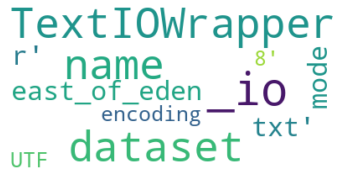

In [57]:
# Import the word cloud function 
from wordcloud import WordCloud 
from nltk.corpus import stopwords


# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(str(east_of_eden))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [58]:
from sklearn.feature_extraction.text import CountVectorizer 

# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(df.review)

# Transform the review column
X_review = vect.transform(df.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]
